<a href="https://colab.research.google.com/github/yunwooseong/rep4DL/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
len(train_data)

25000

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data]) # 최대치가 10000이므로 9999까지 표현

9999

In [6]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review1 = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [9]:
reverse_word_index.get(14 - 3, "?")

'this'

In [10]:
reverse_word_index.get(22 - 3, "?")

'film'

In [13]:
decoded_review1

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review2 = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])

In [16]:
decoded_review2

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [17]:
train_data[0][:5] # = train_data[i][j] position 

[1, 14, 22, 16, 43]

In [18]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.5143 - accuracy: 0.7845 - val_loss: 0.3882 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3047 - accuracy: 0.9016 - val_loss: 0.3001 - val_accuracy: 0.8898
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2193 - accuracy: 0.9290 - val_loss: 0.2958 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1706 - accuracy: 0.9435 - val_loss: 0.2829 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1389 - accuracy: 0.9538 - val_loss: 0.2835 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1153 - accuracy: 0.9643 - val_loss: 0.2980 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0912 - accuracy: 0.9735 - val_loss: 0.3209 - val_accuracy: 0.8831
Epoch 8/20
30

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
history_dict["loss"]

[0.5142782926559448,
 0.30474621057510376,
 0.21933679282665253,
 0.1706497222185135,
 0.13890965282917023,
 0.11529216170310974,
 0.0911700651049614,
 0.07883565127849579,
 0.06327392160892487,
 0.0514691062271595,
 0.04093972221016884,
 0.03222259134054184,
 0.02756006270647049,
 0.01677699014544487,
 0.016570882871747017,
 0.015103191137313843,
 0.0070681339129805565,
 0.010128572583198547,
 0.004187252838164568,
 0.0079343868419528]

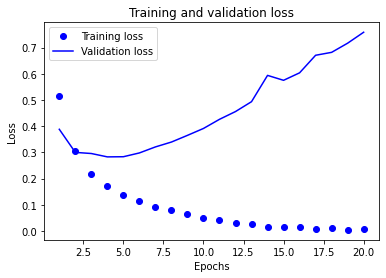

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

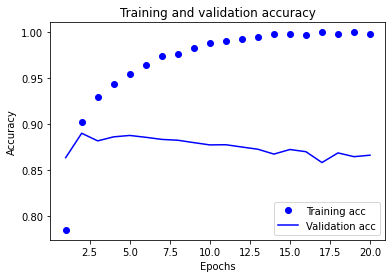

In [28]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4390 - accuracy: 0.8184
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2484 - accuracy: 0.9122
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1958 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3015 - accuracy: 0.8801


In [30]:
results

[0.301456481218338, 0.8801199793815613]

In [31]:
model.predict(x_test)

array([[0.21361089],
       [0.99987984],
       [0.941844  ],
       ...,
       [0.1299349 ],
       [0.07416627],
       [0.66138726]], dtype=float32)